In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
from functools import reduce

In [3]:
chemical_csv = Path("..","datasets", "cscpopendata.csv")
product_csv = Path("..","datasets", "product_info.csv")
chemical_df = pd.read_csv(chemical_csv)
product_df = pd.read_csv(product_csv)

In [4]:
chemical_list = chemical_df[['BrandName']]
chemical_list

,BrandName
0,AVON
1,Glover's
2,Glover's
3,AVON
4,AVON
...,...
114630,YANBAL
114631,YANBAL
114632,YANBAL
114633,YANBAL


In [5]:
brand_unique = chemical_list['BrandName'].unique()
brand_unique

array(['AVON', "Glover's", 'OPI', ..., 'sulwhasoo ', 'HAIR FOOD',
       'YANBAL'], dtype=object)

In [6]:
brand_count = chemical_list['BrandName'].nunique()
brand_count

2714

In [7]:
chemical_names = chemical_df["ChemicalName"].unique()
chemical_names

array(['Titanium dioxide', 'Distillates (coal tar)', 'Estragole',
       'Cocamide diethanolamine', 'Toluene',
       'Chromium (hexavalent compounds)', 'Retinol',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Vitamin A', 'Vitamin A palmitate', 'Butylated hydroxyanisole',
       'Coffea arabica extract', 'Lauramide diethanolamine', 'Coffee',
       'Silica, crystalline (airborne particles of respirable size)',
       'Carbon black (airborne, unbound particles of respirable size)',
       'Carbon black', 'Genistein (purified)', 'Progesterone',
       '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)',
       'Methyleugenol', 'Carbon-black extracts', 'Retinyl palmitate',
       'o-Phenylphenol', 'Acrylamide', 'Formaldehyde (gas)',
       'Ginkgo biloba extract', 'Mica', 'Ethylene glycol',
       'Acetic acid, retinyl ester', 'Ethyl acrylate', 'Trade Secret',
       'Methanol', 'Mineral oils, untreated 

In [8]:
chemicalclean_list = chemical_list.dropna(axis = 0)
chemicalclean_list

,BrandName
0,AVON
1,Glover's
2,Glover's
3,AVON
4,AVON
...,...
114630,YANBAL
114631,YANBAL
114632,YANBAL
114633,YANBAL


In [9]:
brandscount = chemicalclean_list.value_counts().nlargest(n=5)
brandcount = brandscount.reset_index(name='counts')
brandcount.head()

,BrandName,counts
0,SEPHORA,3394
1,NYX,3227
2,bareMinerals,3158
3,Charlotte Tilbury,2453
4,Revlon,2335


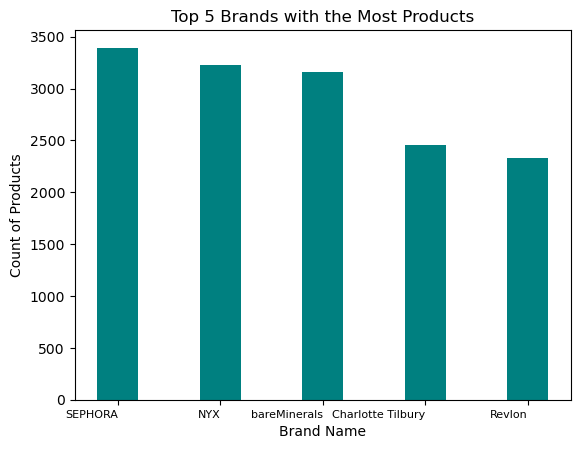

In [27]:
#bar 
plt.bar(brandcount['BrandName'], brandcount['counts'], color ='teal',
        width = 0.4)
plt.xticks(ha='right', fontsize=8) 
plt.xlabel("Brand Name")
plt.ylabel("Count of Products")
plt.title("Top 5 Brands with the Most Products")
plt.savefig("../top5brands.png")
plt.show()

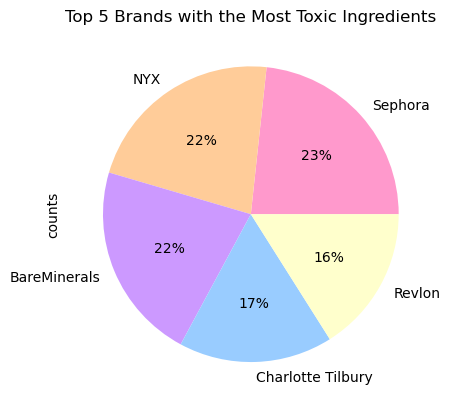

In [29]:
#pie chart
colors = ['#FF99CC', '#FFCC99', '#CC99FF', '#99CCFF', '#FFFFCC']
brandpie = brandcount['BrandName'], brandcount['counts'].plot(title= "Top 5 Brands with the Most Toxic Ingredients",
    kind='pie', labels= ['Sephora', 'NYX', 'BareMinerals', 'Charlotte Tilbury', 'Revlon'], autopct='%1.0f%%', colors=colors)
plt.savefig("../top5brands.png")